# ML CASE STUDIES | NATURAL LANGUAGE PROCESSING (NLP)

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline
# sns.set() 

## Restaurant Reviews | Sentiment Analysis (NLP Case Study)

### Importing & inspecting data

In [ ]:
data = pd.read_csv('data/Restaurant_Reviews.tsv', sep='\t')
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


### Exploring Data

In [ ]:
data['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

<AxesSubplot:xlabel='Liked', ylabel='count'>

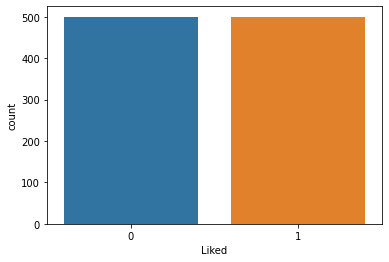

In [ ]:
sns.countplot(x=data['Liked'])

In [ ]:
data['Review Letter Count'] = data['Review'].apply(len)
data




,Review,Liked,Review Letter Count
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59
...,...,...,...
995,I think food should have flavor and texture an...,0,66
996,Appetite instantly gone.,0,24
997,Overall I was not impressed and would not go b...,0,50
998,"The whole experience was underwhelming, and I ...",0,91


In [ ]:
data.iloc[data['Review Letter Count'].idxmax()][0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

### Pre-processing Data (NLTK Text Data Cleaning)

In [ ]:
data['Review'][0]

'Wow... Loved this place.'

In [ ]:
# import string
# string.punctuation

In [ ]:
import nltk

In [ ]:
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omarr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
s = data['Review'][0]
s

'Wow... Loved this place.'

In [ ]:
import re
s = re.sub('[^a-zA-Z]',' ',s)
s

'Wow    Loved this place '

In [ ]:
s.lower()

'wow    loved this place '

In [ ]:
s = s.split()
s

['Wow', 'Loved', 'this', 'place']

In [ ]:
temp = []

for word in s:
    if word not in stopwords.words('english'):
        temp.append(word)
temp

['Wow', 'Loved', 'place']

In [ ]:
[word for word in s if word not in stopwords.words('english')]

['Wow', 'Loved', 'place']

In [ ]:
s = ' '.join(temp)
s

'Wow Loved place'

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
ps = PorterStemmer()

In [ ]:
s = ps.stem(s)
s

'wow loved plac'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 

In [ ]:
cv = CountVectorizer()

In [ ]:
cv.fit_transform(s.split()).toarray()

array([[0, 0, 1],
       [1, 0, 0],
       [0, 1, 0]], dtype=int64)

In [ ]:
# Putting all together

corpus = []

for s in data['Review']:
    # s = data['Review'][i]
    s = re.sub('[^a-zA-Z]'," ",s)
    s.lower()
    s = s.split()
    s = [word for word in s if word not in stopwords.words('english')]
    s = ' '.join(s)
    s = ps.stem(s)
    corpus.append(s)

corpus

['wow loved plac',
 'crust good',
 'not tasty texture nasti',
 'stopped late may bank holiday rick steve recommendation lov',
 'the selection menu great pric',
 'now i getting angry i want damn pho',
 'honeslty taste that fresh',
 'the potatoes like rubber could tell made ahead time kept warm',
 'the fries great',
 'a great touch',
 'service prompt',
 'would go back',
 'the cashier care ever i say still ended wayyy overpr',
 'i tried cape cod ravoli chicken cranberry mmmm',
 'i disgusted i pretty sure human hair',
 'i shocked signs indicate cash',
 'highly recommend',
 'waitress little slow servic',
 'this place worth time let alone vega',
 'like',
 'the burrittos blah',
 'the food amaz',
 'service also cut',
 'i could care less the interior beauti',
 'so perform',
 'that right red velvet cake ohhh stuff good',
 'they never brought salad ask',
 'this hole wall great mexican street tacos friendly staff',
 'took hour get food tables restaurant food luke warm our sever running around like

In [ ]:
cv = CountVectorizer()


In [ ]:
X = cv.fit_transform(corpus).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
y = data['Liked']
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=4)

### Model Building and Selection

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
clf = MultinomialNB()

In [ ]:
clf.fit(X_train, y_train)

MultinomialNB()

### Model Prediction

In [ ]:
y_pred = clf.predict(X_test)
y_pred


array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,

In [ ]:
y_test.values

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,

### Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
print(accuracy_score(y_test, y_pred))
print(' ')
print(confusion_matrix(y_test, y_pred))

0.7454545454545455
 
[[126  49]
 [ 35 120]]


### Model Deployement and Production

In [ ]:
import joblib

In [ ]:
joblib.dump(clf, 'resturant.pkl')

['resturant.pkl']

In [ ]:
loaded = joblib.load('resturant.pkl')

In [ ]:

corpus = []


s = 'wow'
s = re.sub('[^a-zA-Z]'," ",s)
s.lower()
s = s.split()
s = [word for word in s if word not in stopwords.words('english')]
s = ' '.join(s)
s = ps.stem(s)
corpus.append(s)

corpus

cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
loaded.predict(X)


ValueError: X has 1 features, but MultinomialNB is expecting 2057 features as input.